In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [73]:
#importing the datasets we're going to work with

ansur_df = pd.read_csv('data/ansur.csv')      #ansur (male + female) only 200 first rows 
ansur_df_male = pd.read_csv('data/ansur_2_male.csv')    #ansur male dataset

In [74]:
ansur_df.head()

,Gender,weight_kg,stature_m,body_height
0,Male,853,81.5,175
1,Male,815,72.6,167
2,Male,831,92.9,180
3,Male,793,79.4,176
4,Male,954,94.6,188


[]

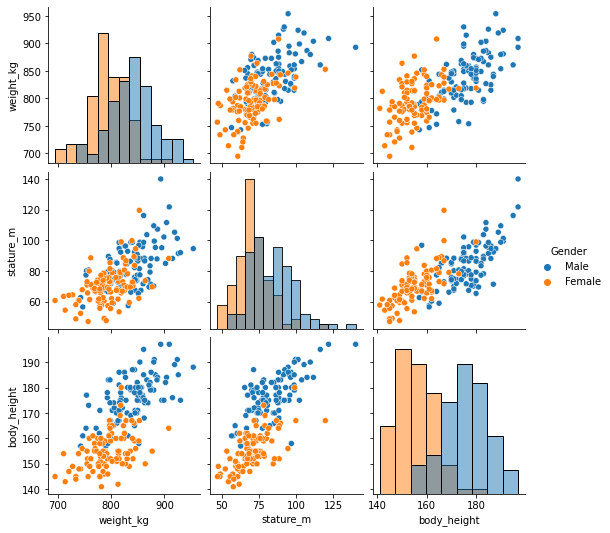

In [75]:
#Creating a seaborn pairplot and coloring the points using the 'Gender' feature of the ansur dataset

sns.pairplot(ansur_df, hue='Gender', diag_kind='hist')
plt.plot()

In [76]:
ansur_df_male.select_dtypes('object')

,Branch,Component,Gender,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,Overweight,Tall
1,Combat Support,Regular Army,Male,Overweight,Normal
2,Combat Support,Regular Army,Male,Overweight,Normal
3,Combat Service Support,Regular Army,Male,Overweight,Normal
4,Combat Service Support,Regular Army,Male,Overweight,Tall
...,...,...,...,...,...
4077,Combat Arms,Army National Guard,Male,Normal,Normal
4078,Combat Arms,Army National Guard,Male,Overweight,Tall
4079,Combat Arms,Army National Guard,Male,Overweight,Normal
4080,Combat Arms,Army National Guard,Male,Normal,Normal


In [80]:
#Removing non-numerical columns in the dataset and fitting the t-SNE model on the updated dataset

non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class']
ansur_df_male_numeric = ansur_df_male.drop(non_numeric, axis = 1)

print('shape before the fit_transform :' + str(ansur_df_male_numeric.shape))

m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(ansur_df_male_numeric)

print('shape after the fit_transform :' + str(tsne_features.shape))


shape before the fit_transform :(4082, 94)


C:\Users\dell g5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


shape after the fit_transform :(4082, 2)


In [81]:
result = pd.read_csv('data/t_sne_visu.csv')    #df to visualize the output of t-SNE dimensionality reduction
result

,Unnamed: 0,Gender,weight_kg,stature_m,body_height,x,y
0,0,Male,853,81.5,175,-3.861545,0.721990
1,1,Male,815,72.6,167,-14.636895,24.068016
2,2,Male,831,92.9,180,16.971266,-3.185802
3,3,Male,793,79.4,176,12.985806,41.171623
4,4,Male,954,94.6,188,-24.361904,-46.152090
...,...,...,...,...,...,...,...
195,195,Female,734,58.1,144,-27.784730,-7.653139
196,196,Female,721,64.2,147,-15.163285,19.621513
197,197,Female,809,75.8,160,-26.492857,-22.109644
198,198,Female,779,68.3,154,30.123203,10.843167


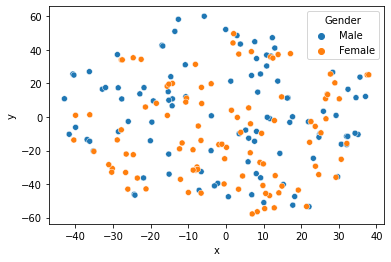

In [82]:
# visualisation of the dimensionality reduction result using t-SNE from sklearn

sns.scatterplot(x="x", y="y", hue='Gender', data=result)
plt.show()